<a href="https://colab.research.google.com/github/Jiyun2025/Who-are-you/blob/main/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
import matplotlib.pyplot as plt

In [7]:
pip install -U pandas_datareader

In [8]:
pip install -U yfinance

In [10]:
pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.6 MB/s eta 0:00:00


In [11]:
import FinanceDataReader as fdr

In [12]:
from pandas_datareader import data as pdr

In [13]:
import yfinance as yf

In [14]:
# NVIDIA 티커 설정
ticker = "NVDA"

# 데이터 다운로드 (예: 2019년 1월 1일부터 현재까지)
nvda_data = yf.download(ticker, start="2019-01-01", end="2025-10-05")

# 상위 5개 데이터 확인
print(nvda_data.head())

/tmp/ipython-input-3139007956.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download(ticker, start="2019-01-01", end="2025-10-05")
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2019-01-02  3.377354  3.433387  3.224379  3.239007  508752000
2019-01-03  3.173305  3.351074  3.165867  3.317107  705552000
2019-01-04  3.376610  3.414792  3.215701  3.246445  585620000
2019-01-07  3.555371  3.592313  3.382561  3.433884  709160000
2019-01-08  3.466858  3.639173  3.394214  3.636941  786016000


In [16]:
nvda_data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2019-01-02,3.377354,3.433387,3.224379,3.239007,508752000
2019-01-03,3.173305,3.351074,3.165867,3.317107,705552000
2019-01-04,3.376610,3.414792,3.215701,3.246445,585620000
2019-01-07,3.555371,3.592313,3.382561,3.433884,709160000
2019-01-08,3.466858,3.639173,3.394214,3.636941,786016000
...,...,...,...,...,...
2025-09-29,181.850006,184.000000,180.320007,180.429993,193063500
2025-09-30,186.580002,187.350006,181.479996,182.080002,236981000


In [17]:
nvda_data = nvda_data.reset_index(level=0,col_fill="Date")

In [18]:
nvda_data = nvda_data[['Date','Close']]

In [19]:
nvda_data

Price,Date,Close
Ticker,Date,NVDA
0,2019-01-02,3.377354
1,2019-01-03,3.173305
2,2019-01-04,3.376610
3,2019-01-07,3.555371
4,2019-01-08,3.466858
...,...,...
1694,2025-09-29,181.850006
1695,2025-09-30,186.580002
1696,2025-10-01,187.240005


In [21]:
nvda_data.columns = nvda_data.columns.droplevel(0)
display(nvda_data)

Ticker,Date,NVDA
0,2019-01-02,3.377354
1,2019-01-03,3.173305
2,2019-01-04,3.376610
3,2019-01-07,3.555371
4,2019-01-08,3.466858
...,...,...
1694,2025-09-29,181.850006
1695,2025-09-30,186.580002
1696,2025-10-01,187.240005
1697,2025-10-02,188.889999


In [22]:
# Data preprocessing

In [24]:
#날짜컬럼을 날짜형식으로 변환
nvda_data["Date"] = pd.to_datetime(nvda_data["Date"])

In [29]:
nvda_data["Close"] = nvda_data["Close"].astype(float)

In [30]:
nvda_data = nvda_data.set_index("Date")

In [31]:
nvda_data

Ticker,Close
Date,
2019-01-02,3.377354
2019-01-03,3.173305
2019-01-04,3.376610
2019-01-07,3.555371
2019-01-08,3.466858
...,...
2025-09-29,181.850006
2025-09-30,186.580002
2025-10-01,187.240005


In [32]:
#Feature Engineering

In [34]:
# moving average calculation
#이동 평균은 일정 기간 동안의 주가 평균을 나타내므로 주가의 추세를 파악하는데 도움이 된다 .

nvda_data["moving_AVG"] = nvda_data["Close"].rolling(window=5).mean()

In [35]:
# last N days profit calculation
# 주가의 상승도 또는 하락 정도를 측정하는 지표
n=5
nvda_data["profit"] = (nvda_data["Close"]-nvda_data["Close"].shift(n))/nvda_data["Close"].shift(n)

In [36]:
#Split Data for training and testing

In [37]:
X = nvda_data[["moving_AVG","profit"]].dropna()
y = nvda_data["Close"].dropna()

In [38]:
X

Ticker,moving_AVG,profit
Date,,
2019-01-09,3.421437,0.046689
2019-01-10,3.506925,0.134698
2019-01-11,3.569602,0.092811
2019-01-14,3.604511,0.049093
2019-01-15,3.654296,0.071801
...,...,...
2025-09-29,178.626001,-0.009586
2025-09-30,180.256003,0.045676
2025-10-01,182.310004,0.058032


In [40]:
y

,Close
Date,
2019-01-02,3.377354
2019-01-03,3.173305
2019-01-04,3.376610
2019-01-07,3.555371
2019-01-08,3.466858
...,...
2025-09-29,181.850006
2025-09-30,186.580002
2025-10-01,187.240005


In [ ]:
#X는 5일 뒤의 정보부터 있고 y는 전체의 정보가 있어서 y의 5줄을 빼고 대조해야함


In [41]:
y=y[5:]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
# data 차원 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1355, 2)
X_test shape: (339, 2)
y_train shape: (1355,)
y_test shape: (339,)


In [44]:
# machine learning model training

In [45]:
model=LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#학습 데이터 점수

In [47]:
model.score(X_train, y_train)

0.9987221020830058

In [ ]:
#테스트 데이터 점수

In [49]:
model.score(X_test,y_test)

0.9987653917158671

In [50]:
# 예측 및 평가

In [51]:
# 학습된 모델을 사용해서 X_test의 특징을 바탕으로 주가를 예측하는 것
y_pred = model.predict(X_test)

In [52]:
#예측 결과와 실제 값 비교하기 : 실제 주가 (y_test)과 예측한 주가 값 (y_pred)을 데이터프레임으로 만들어서 출력한다. 이를 통해 모델의 예측 결과를 확인할 수 있다.

In [53]:
Prediction = pd.DataFrame({'real':y_test, 'prediction':y_pred})

In [57]:
prediction = Prediction.sort_index()
display(prediction.head())

,real,prediction
Date,,
2019-01-31,3.564048,1.743904
2019-02-12,3.748015,3.642750
2019-02-21,3.862065,4.015498
2019-02-22,3.946858,4.237744
2019-02-26,3.895040,3.765234


In [58]:
# 머신러닝 모델 예측 성능을 평가하는 지표 중 하나. 실제값, 예측값 간의 차이를 제곱하고 평균을 구한 값 (작을수록 모델의 예측이 정확하다고 판단 )
mse = mean_squared_error(y_test, y_pred)
print("MSE:",mse)

MSE: 2.9763676304525695


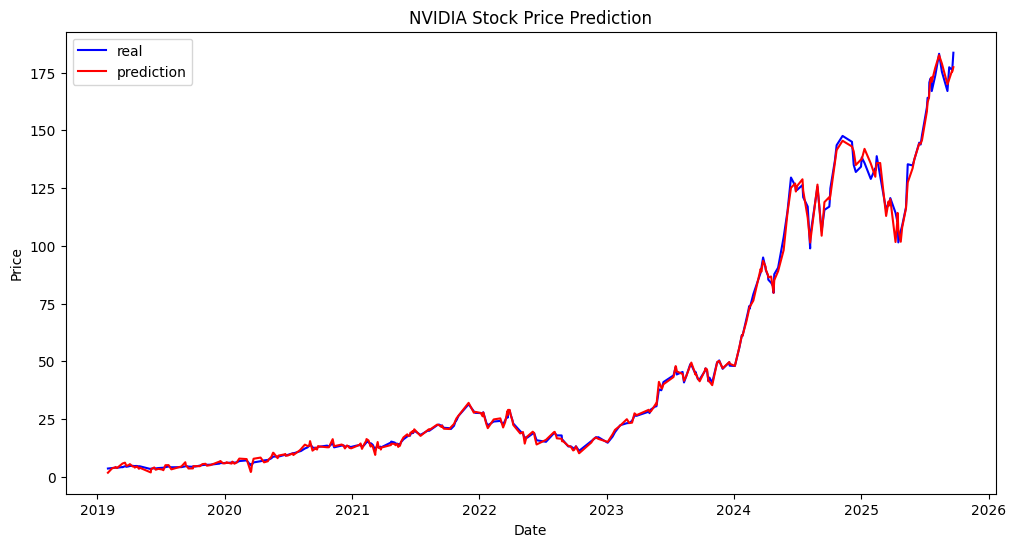

In [60]:
#visualization

plt.figure(figsize=(12,6))
plt.plot(prediction.index, prediction['real'], label='real', color='blue')
plt.plot(prediction.index, prediction['prediction'], label='prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVIDIA Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:

# Prediction in real after 10days (based on 10/5/2024)

In [70]:
# 최근 n일 데이터 가져오기 (피처 계산에 필요한 기간)
n = 5
last_data = nvda_data[-n:].copy()

# 예측할 미래 날짜 수 설정
future_days = 10
future_predictions_list = []
future_dates_list = []

# 예측 루프
for i in range(future_days):
    # 마지막 데이터의 인덱스 (날짜) 가져오기
    last_date = last_data.index[-1]

    # 다음 예측 날짜 계산 (영업일 기준)
    next_date = last_date + pd.Timedelta(days=1)
    while next_date.dayofweek > 4: # 토요일(5) 또는 일요일(6)이면 다음 날로
        next_date += pd.Timedelta(days=1)

    future_dates_list.append(next_date)

    # 이동평균 계산: last_data의 'Close' 컬럼 사용
    # window 크기만큼 데이터가 필요하므로, n일치 데이터가 있는지 확인
    if len(last_data) >= n:
        moving_avg = last_data["Close"].rolling(window=n).mean().iloc[-1]
    else:
        # 데이터 부족 시 이동평균 계산 불가 - 예측 중단 또는 다른 처리
        # 여기서는 데이터 부족 시 예측을 중단하도록 합니다.
        print(f"Warning: Not enough data to calculate moving average for day {i+1}. Stopping prediction.")
        break

    # profit 계산 (최근 n일 대비 변화율): last_data의 'Close' 컬럼 사용
    if len(last_data) >= n:
        profit = (last_data["Close"].iloc[-1] - last_data["Close"].iloc[-n]) / last_data["Close"].iloc[-n]
    else:
         # 데이터 부족 시 profit 계산 불가 - 예측 중단 또는 다른 처리
        print(f"Warning: Not enough data to calculate profit for day {i+1}. Stopping prediction.")
        break

    # 모델에 넣을 feature DataFrame 생성
    X_future = pd.DataFrame({"moving_AVG":[moving_avg], "profit":[profit]})

    # 예측
    pred = model.predict(X_future)[0]
    future_predictions_list.append(pred)

    # 예측값을 다음 피처 계산을 위해 last_data에 추가
    # 추가할 데이터는 Series 형태로 만들고 인덱스를 다음 예측 날짜로 설정
    new_row_data = pd.Series({'Close': pred}, name=next_date)
    last_data = pd.concat([last_data, new_row_data.to_frame().T])


# 예측 결과를 DataFrame으로 저장
future_predictions_df = pd.DataFrame({'prediction': future_predictions_list}, index=future_dates_list)

display(future_predictions_df)

,prediction
2025-10-06,187.468713
2025-10-07,188.119548
2025-10-08,188.427427
2025-10-09,188.539365
2025-10-10,188.598988
2025-10-13,188.815479
2025-10-14,189.044611
2025-10-15,189.222804
2025-10-16,189.388647
2025-10-17,189.569072


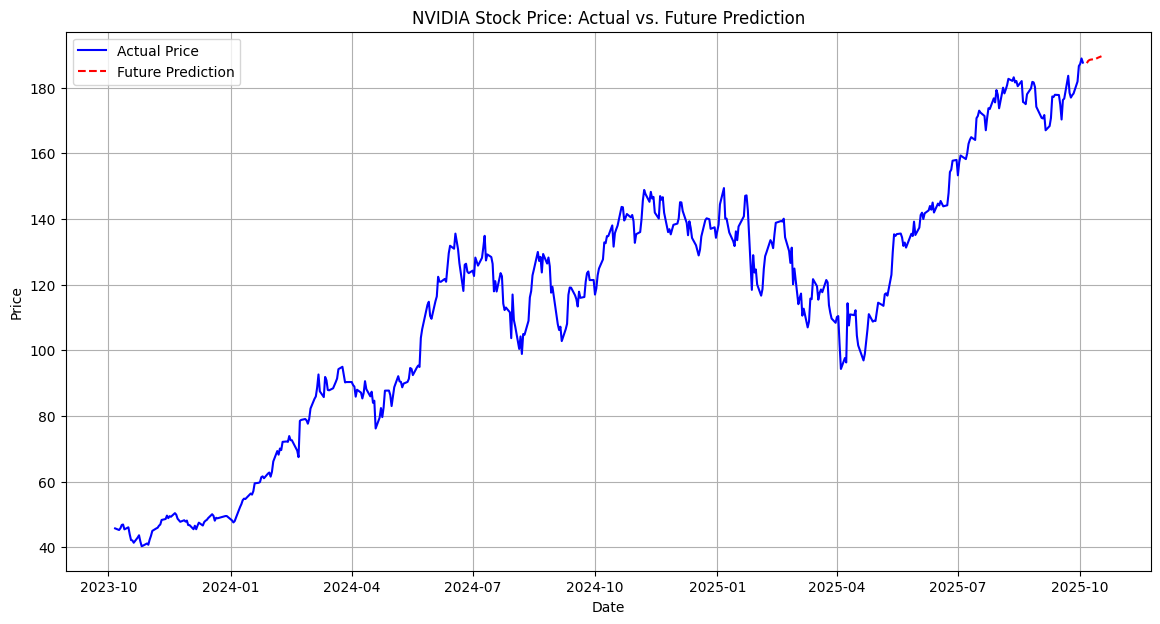

In [72]:
# 실제 주가 데이터와 미래 예측 데이터 시각화

plt.figure(figsize=(14, 7))

# 실제 주가 데이터 플롯 (마지막 500일 정도만 표시하여 미래 예측 부분에 집중)
plt.plot(nvda_data.index[-500:], nvda_data["Close"][-500:], label="Actual Price", color="blue")

# 미래 예측 데이터 플롯
plt.plot(future_predictions_df.index, future_predictions_df["prediction"], label="Future Prediction", color="red", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("NVIDIA Stock Price: Actual vs. Future Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 투자 의사 결정 지원
# 리스크 관리에 도움
# 시장 동향 파악에 유용
# 자동화된 투자 시스템에 적용 가능
# 투자자들에게 경쟁 우위를 제공
